In [87]:
import os
import zipfile
import random
import shutil
from shutil import copyfile
from os import getcwd
import pathlib
import datetime
from distutils.dir_util import copy_tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import cv2
from PIL import Image


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import model_from_json
from sklearn.model_selection import train_test_split


import matplotlib.pylab as plt
import numpy as np

%matplotlib notebook
%matplotlib notebook

In [65]:
#fromDir = "C:/Users/Serj/Pictures/PetImages"
#toDir = "C:/Users/Serj/Pictures/PetImages2"

#copy_tree(fromDir, toDir)

['C:/Users/Serj/Pictures/PetImages2\\Cat\\0.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\1.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\100.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\1000.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10000.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10001.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10002.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10003.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10004.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10005.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10006.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10007.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10008.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10009.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\1001.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10010.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\10011.jpg',
 'C:/Users/Serj/Pictures/PetImages2\\Cat\\1

In [156]:
current_working_dir = os.getcwd()

path_to_images = pathlib.Path(os.path.join(current_working_dir, 'Pictures','PetImages2'))

Dogs_dir = os.path.join(path_to_images, 'Dog')
Cats_dir = os.path.join(path_to_images, 'Cat')

print(len(os.listdir(Dogs_dir)))
print(len(os.listdir(Cats_dir)))


dog_image_fnames = os.listdir(Dogs_dir)
cat_image_fnames = os.listdir(Cats_dir)

11563
11637


In [68]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(path_to_images, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Images deleted: %d " % num_skipped)

Deleted 1578 images


In [157]:
image_count = len(list(path_to_images.glob('*/*.jpg')))
print(image_count)

23200


In [158]:
file_names_of_bad_images = ['5673.jpg','4688.jpg','12376.jpg','1043.jpg','8456.jpg',
                      '9517.jpg','7377.jpg','1773.jpg','8736.jpg','10712.jpg','7564.jpg']
# Eliminare le immagini di cane
for file_name in file_names_of_bad_images:
    dog_image_path = os.path.join(Dogs_dir, file_name)
    if os.path.exists(dog_image_path):
        os.remove(dog_image_path)
        print(f"Eliminata l'immagine del cane: {file_name}")

# Eliminare le immagini di gatto
for file_name in file_names_of_bad_images:
    cat_image_path = os.path.join(Cats_dir, file_name)
    if os.path.exists(cat_image_path):
        os.remove(cat_image_path)
        print(f"Eliminata l'immagine del gatto: {file_name}")


In [159]:
new_img_size = (128,128)
data_split = 0.2
batch_size = 64 
seed_value = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_images,
    validation_split=data_split,
    subset="training",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_images,
    validation_split=data_split,
    subset="validation",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Serj/Pictures/Test_Set',
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

Found 23200 files belonging to 2 classes.
Using 18560 files for training.
Found 23200 files belonging to 2 classes.
Using 4640 files for validation.
Found 200 files belonging to 2 classes.


In [160]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


<IPython.core.display.Javascript object>


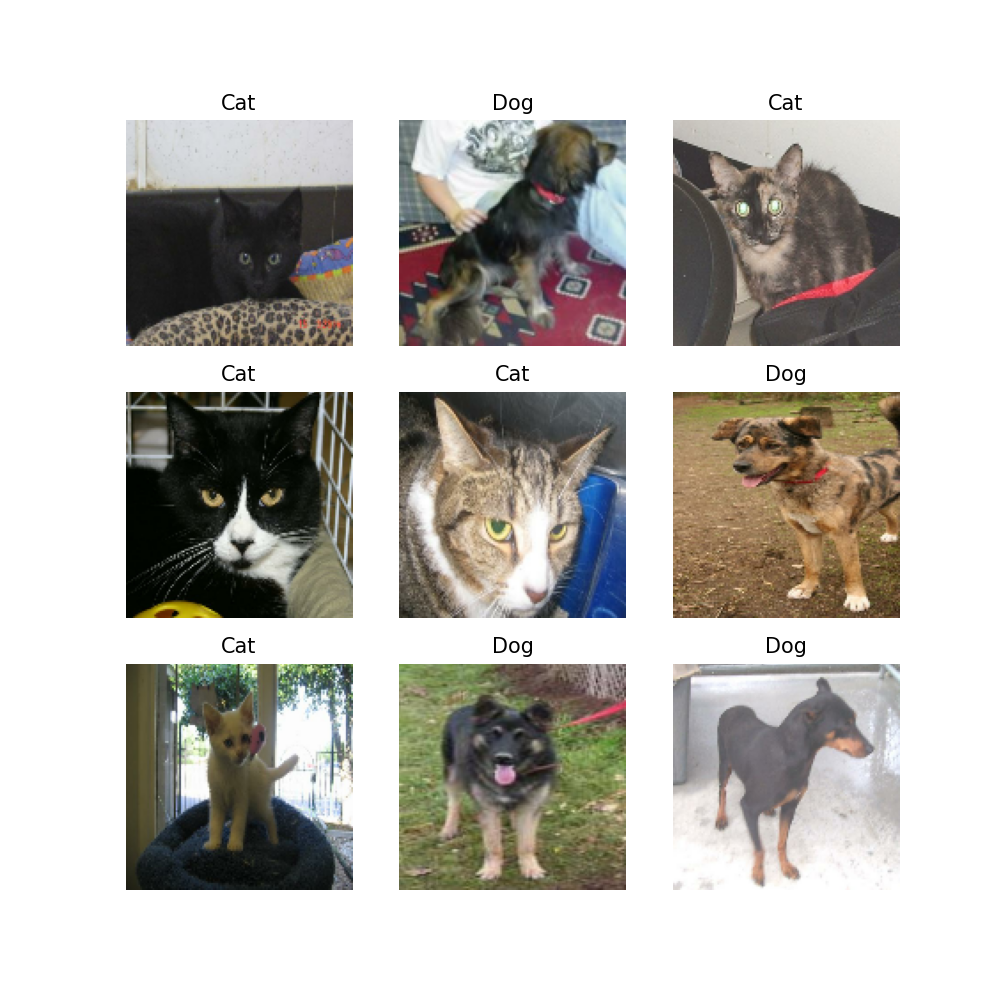

In [161]:
plt.figure(figsize=(8,8))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [185]:
model = Sequential()
    
model.add(Conv2D(8, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(16, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),)
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) 

In [186]:
history = model.fit(train_ds,validation_data = val_ds,epochs = 20 )

Epoch 1/20
290/290 [==============================] - 40s 132ms/step - loss: 0.6391 - acc: 0.6764 - val_loss: 0.5381 - val_acc: 0.7420
Epoch 2/20
290/290 [==============================] - 42s 145ms/step - loss: 0.5024 - acc: 0.7511 - val_loss: 0.4874 - val_acc: 0.7634
Epoch 3/20
290/290 [==============================] - 40s 136ms/step - loss: 0.4646 - acc: 0.7789 - val_loss: 0.4520 - val_acc: 0.7832
Epoch 4/20
290/290 [==============================] - 39s 134ms/step - loss: 0.4282 - acc: 0.7983 - val_loss: 0.4518 - val_acc: 0.7866
Epoch 5/20
290/290 [==============================] - 39s 132ms/step - loss: 0.4034 - acc: 0.8100 - val_loss: 0.4300 - val_acc: 0.8026
Epoch 6/20
290/290 [==============================] - 38s 131ms/step - loss: 0.3721 - acc: 0.8284 - val_loss: 0.4507 - val_acc: 0.7937
Epoch 7/20
290/290 [==============================] - 39s 133ms/step - loss: 0.3484 - acc: 0.8425 - val_loss: 0.4506 - val_acc: 0.7996
Epoch 8/20
290/290 [==============================] - 3

<IPython.core.display.Javascript object>


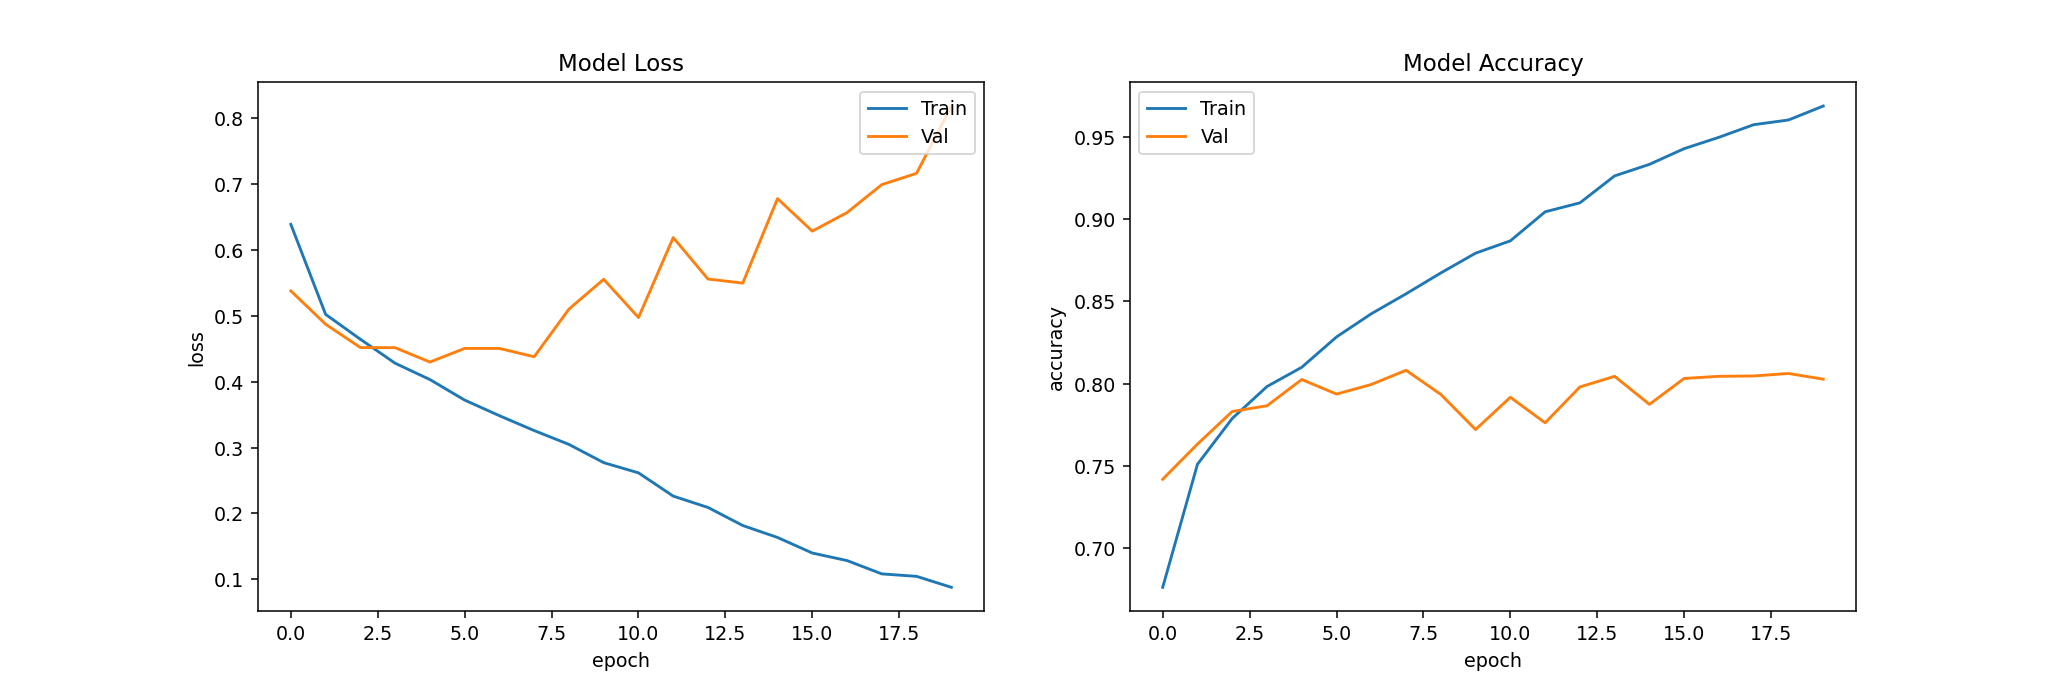

<function matplotlib.pyplot.show(*, block=None)>

In [187]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper right')

plt.subplot(1, 2, 2)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show

In [172]:
model = Sequential()
    
model.add(Conv2D(16, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),)
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(train_ds,validation_data = val_ds,epochs = 25 )

In [173]:
history = model.fit(train_ds,validation_data = val_ds,epochs = 25 )

Epoch 1/25
290/290 [==============================] - 80s 269ms/step - loss: 0.6493 - acc: 0.6546 - val_loss: 0.6265 - val_acc: 0.6640
Epoch 2/25
290/290 [==============================] - 79s 270ms/step - loss: 0.5175 - acc: 0.7457 - val_loss: 0.6588 - val_acc: 0.7259
Epoch 3/25
290/290 [==============================] - 79s 270ms/step - loss: 0.4584 - acc: 0.7830 - val_loss: 0.5049 - val_acc: 0.7603
Epoch 4/25
290/290 [==============================] - 79s 271ms/step - loss: 0.4110 - acc: 0.8105 - val_loss: 0.5494 - val_acc: 0.7457
Epoch 5/25
290/290 [==============================] - 79s 272ms/step - loss: 0.3784 - acc: 0.8270 - val_loss: 0.4082 - val_acc: 0.8162
Epoch 6/25
290/290 [==============================] - 81s 277ms/step - loss: 0.3492 - acc: 0.8452 - val_loss: 0.4305 - val_acc: 0.8009
Epoch 7/25
290/290 [==============================] - 79s 272ms/step - loss: 0.3212 - acc: 0.8624 - val_loss: 0.3663 - val_acc: 0.8416
Epoch 8/25
290/290 [==============================] - 8

<IPython.core.display.Javascript object>


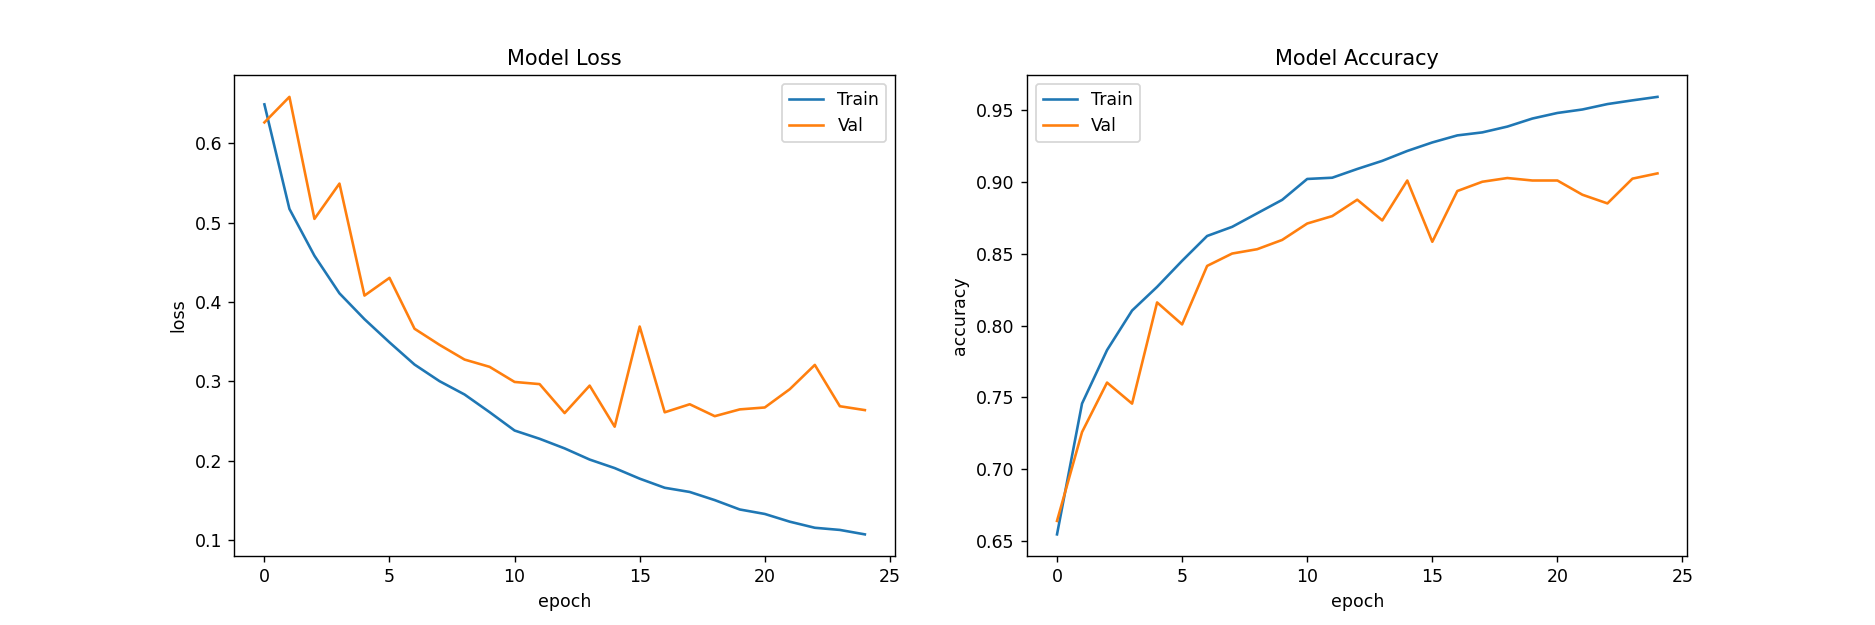

<function matplotlib.pyplot.show(*, block=None)>

In [174]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper right')

plt.subplot(1, 2, 2)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show

In [175]:
import numpy as np

y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)  
    y_pred.extend(predictions)  
    y_true.extend(labels.numpy())  

y_pred = np.array(y_pred).reshape(-1)  
y_true = np.array(y_true)
y_pred_classes = np.where(y_pred < 0.5, 0, 1)

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


1/1 [==============================] - 0s 153ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

